In [1]:
# Predict the price of the Uber ride from a given pickup

# point to the agreed drop-off location.
# Perform following tasks:
# 1. Pre-process the dataset.
# 2. Identify outliers.
# 3. Check the correlation.
# 4. Implement linear regression and random forest
# regression models.
# 5. Evaluate the models and compare their respective
# scores like R2, RMSE, etc.
# Dataset link:
# https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from math import cos, asin, sqrt, pi

In [4]:
df = pd.read_csv("/content/uber.csv")

In [5]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [6]:

def remove_out_of_range_values(df):

  longitude_range = (-180.0, 180.0)
  latitude_range = (-90.0, 90.0)

  df_filtered = df[(df['pickup_longitude'].between(longitude_range[0], longitude_range[1]))
                    & (df['pickup_latitude'].between(latitude_range[0], latitude_range[1]))
                    & (df['dropoff_longitude'].between(longitude_range[0], longitude_range[1]))
                    & (df['dropoff_latitude'].between(latitude_range[0], latitude_range[1]))]

  return df_filtered



In [7]:
def haversine(lon_1,lon_2,lat_1,lat_2):
  radius = 6371
  lon_1,lon_2,lat_1,lat_2 = map(np.radians, [lon_1,lon_2,lat_1,lat_2])

  diff_lon = lon_2 - lon_1
  diff_lat = lat_2 - lat_1

  km = 2 * radius * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2) + np.cos(lat_1)* np.cos(lat_2)* np.sin(diff_lon/2.0)**2)

  return km


In [8]:
df = remove_out_of_range_values(df)

In [9]:
df['distance'] = haversine(df['pickup_longitude'],df['dropoff_longitude'],df['pickup_latitude'],df['dropoff_latitude'])

<ipython-input-9-c0806185a572>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = haversine(df['pickup_longitude'],df['dropoff_longitude'],df['pickup_latitude'],df['dropoff_latitude'])


In [10]:
df


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683126
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457408
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,3.545565
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.390558
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,1.909613
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.103411
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,0.309724
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,7.114242
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.340062


Text(0, 0.5, 'fare_amount')

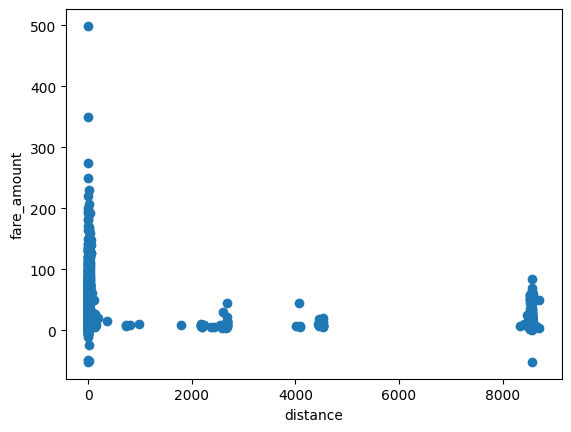

In [11]:
plt.scatter(df['distance'], df['fare_amount'])
plt.xlabel('distance')
plt.ylabel('fare_amount')

In [12]:
df.drop(df[df['distance']>50].index,inplace= True)
df.drop(df[df['distance']==0].index,inplace= True)
df.drop(df[df['fare_amount']==0].index,inplace= True)
df.drop(df[df['fare_amount'] <0].index,inplace= True)

<ipython-input-12-bd699dbdb6f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['distance']>50].index,inplace= True)
<ipython-input-12-bd699dbdb6f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['distance']==0].index,inplace= True)
<ipython-input-12-bd699dbdb6f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['fare_amount']==0].index,inplace= True)
<ipython-input-12-bd699dbdb6f6>:4: Setti

Text(0, 0.5, 'fare_amount')

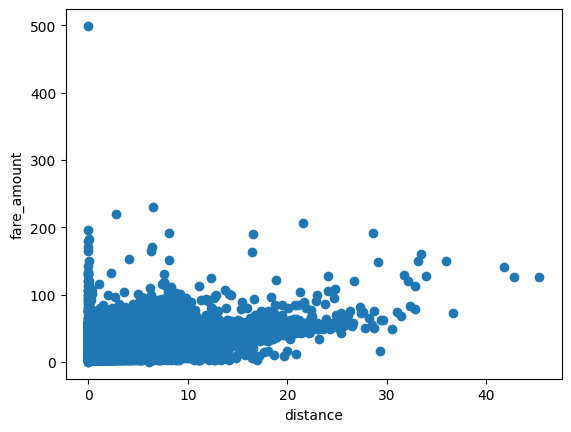

In [13]:
plt.scatter(df['distance'], df['fare_amount'])
plt.xlabel('distance')
plt.ylabel('fare_amount')

In [14]:
df.drop(df[(df['fare_amount']>100) & (df['distance']<1)].index,inplace= True)
df.drop(df[(df['fare_amount']<100) & (df['distance']>100)].index,inplace= True)

<ipython-input-14-1cca890f9c21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['fare_amount']>100) & (df['distance']<1)].index,inplace= True)
<ipython-input-14-1cca890f9c21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['fare_amount']<100) & (df['distance']>100)].index,inplace= True)


Text(0, 0.5, 'fare_amount')

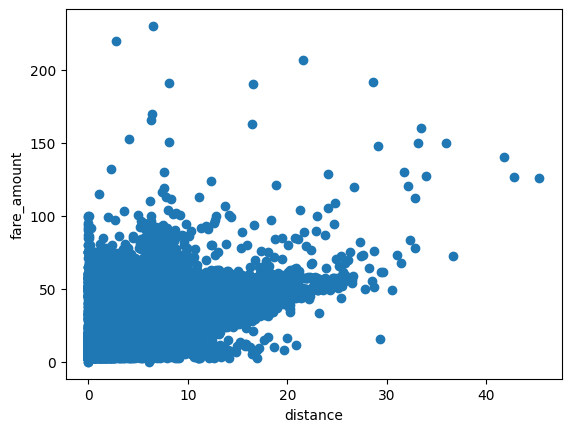

In [15]:
plt.scatter(df['distance'], df['fare_amount'])
plt.xlabel('distance')
plt.ylabel('fare_amount')

<ipython-input-16-b7e4f8f06b26>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

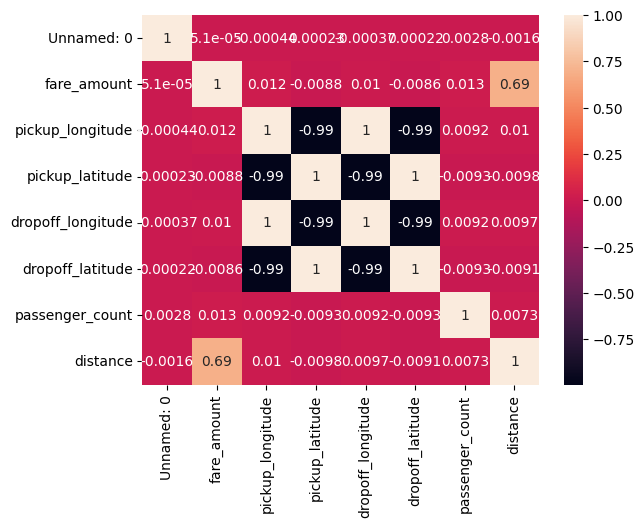

In [16]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True)

In [17]:
X = df['fare_amount'].values.reshape(-1,1)
Y = df['distance'].values.reshape(-1,1)

In [18]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_std = std.fit_transform(X)
y_std = std.fit_transform(Y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_std, y_std, test_size = 0.2, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression()

In [21]:
y_pred = LR.predict(X_test)

In [22]:
from sklearn import metrics
print("Mean absolute error", metrics.mean_absolute_error(Y_test,y_pred))
print("Mean squared error", metrics.mean_squared_error(Y_test,y_pred))
print("Root mean squared error", np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print("R2 square", metrics. r2_score(Y_test,y_pred))

Mean absolute error 0.45366978686680737
Mean squared error 0.507207114957175
Root mean squared error 0.7121847477706715
R2 square 0.48855891973411725


Text(0, 0.5, 'fare')

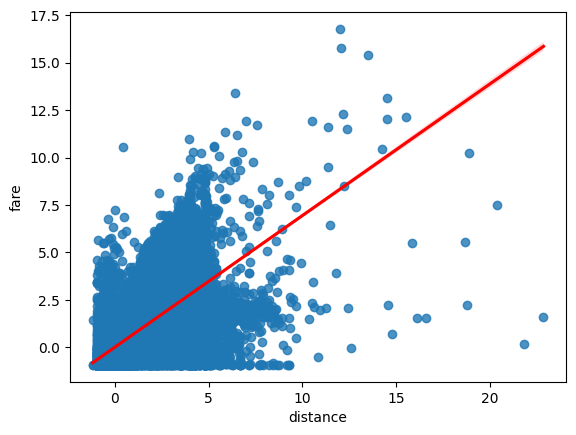

In [23]:
sns.regplot(x = x_std , y = y_std, data = df, line_kws = {"color": "red"})
plt.xlabel("distance")
plt.ylabel("fare")